In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\Downloads\gva_data_1950_2024.csv")

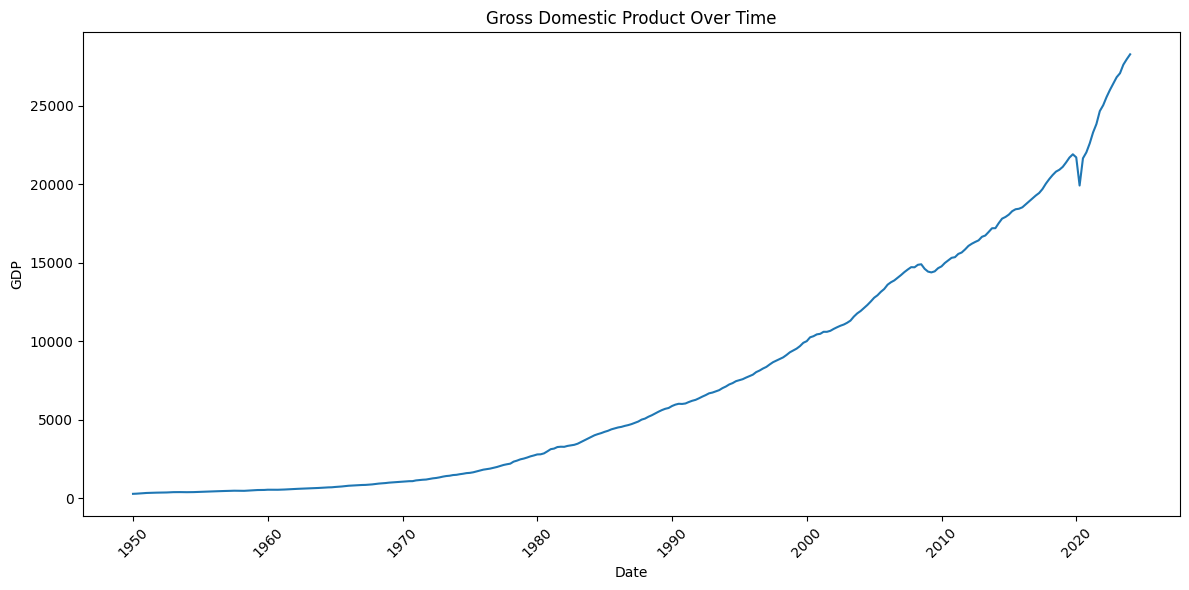

In [12]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])
# Sort the data by date
data = data.sort_values('date')
# Plot GDP over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['Gross domestic product'])
plt.title('Gross Domestic Product Over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent cut-off labels
plt.show()

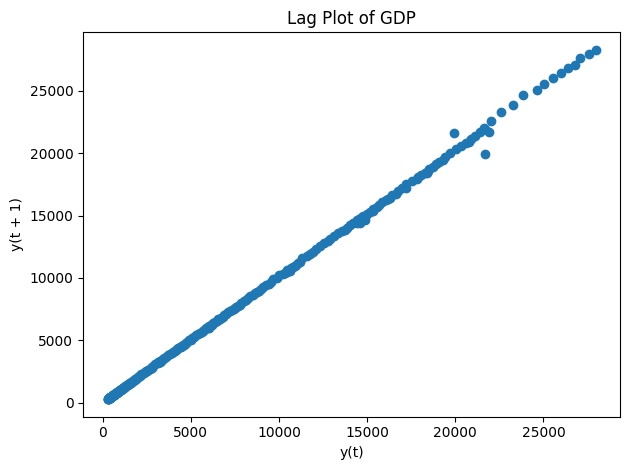

In [13]:
from pandas.plotting import lag_plot
lag_plot(data['Gross domestic product'])
plt.title('Lag Plot of GDP')
plt.tight_layout()
plt.show()

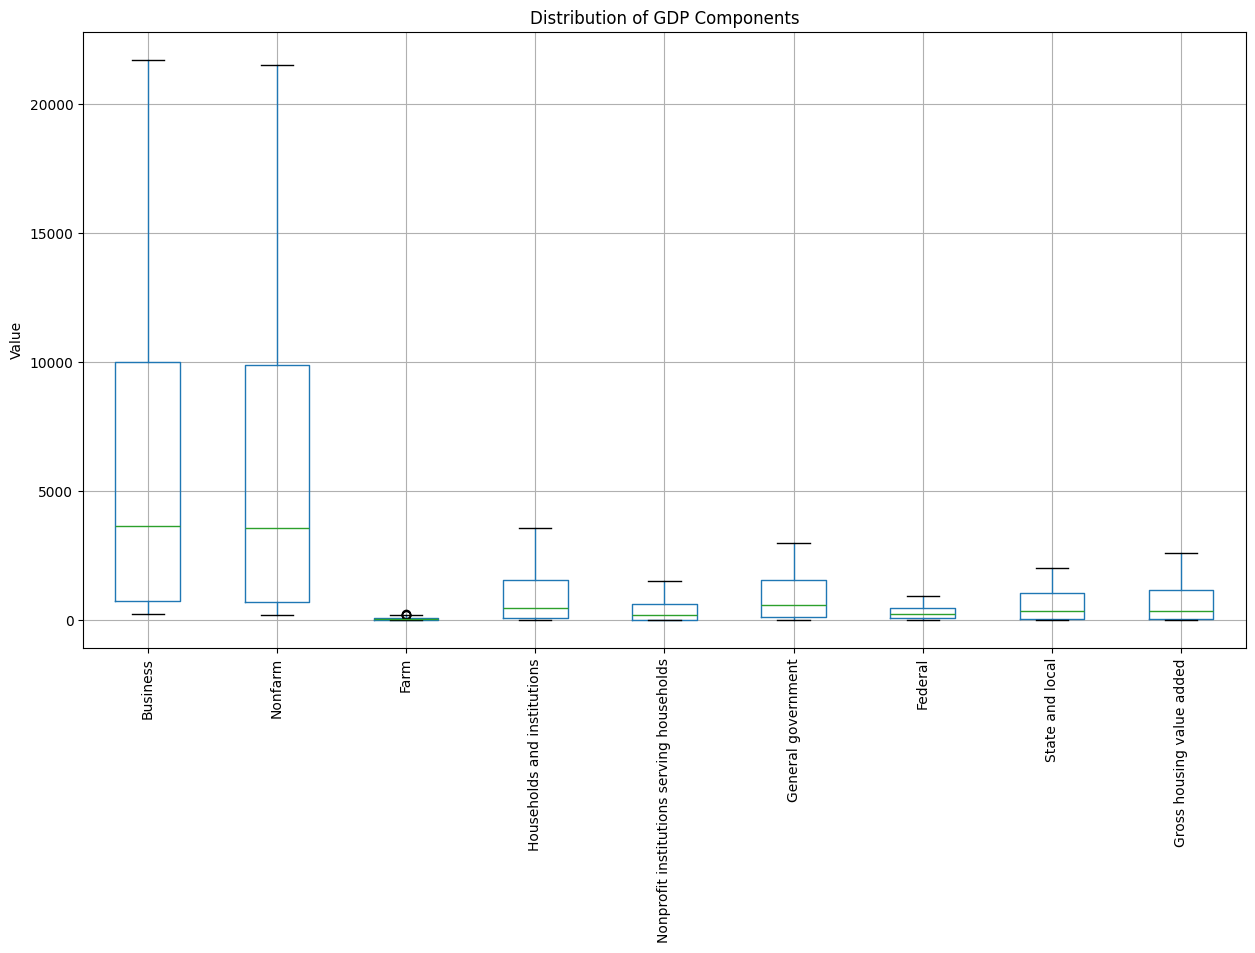

In [14]:
# Boxplot for different GDP components
gdp_components = ['Business', 'Nonfarm', 'Farm', 'Households and institutions', 
                  'Nonprofit institutions serving households', 'General government', 
                  'Federal', 'State and local', 'Gross housing value added']

plt.figure(figsize=(15, 8))
data[gdp_components].boxplot()
plt.title('Distribution of GDP Components')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.show()

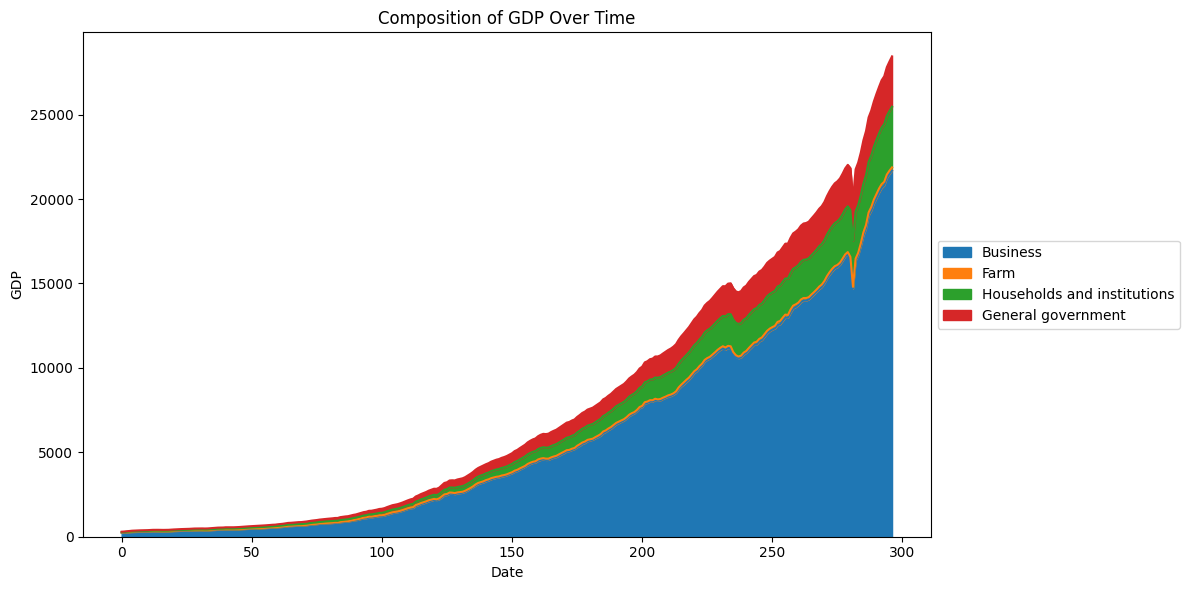

In [15]:
# Year-over-Year Growth Rate Chart
components = ['Business', 'Farm', 'Households and institutions', 'General government']
data[components].plot.area(figsize=(12, 6))
plt.title('Composition of GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

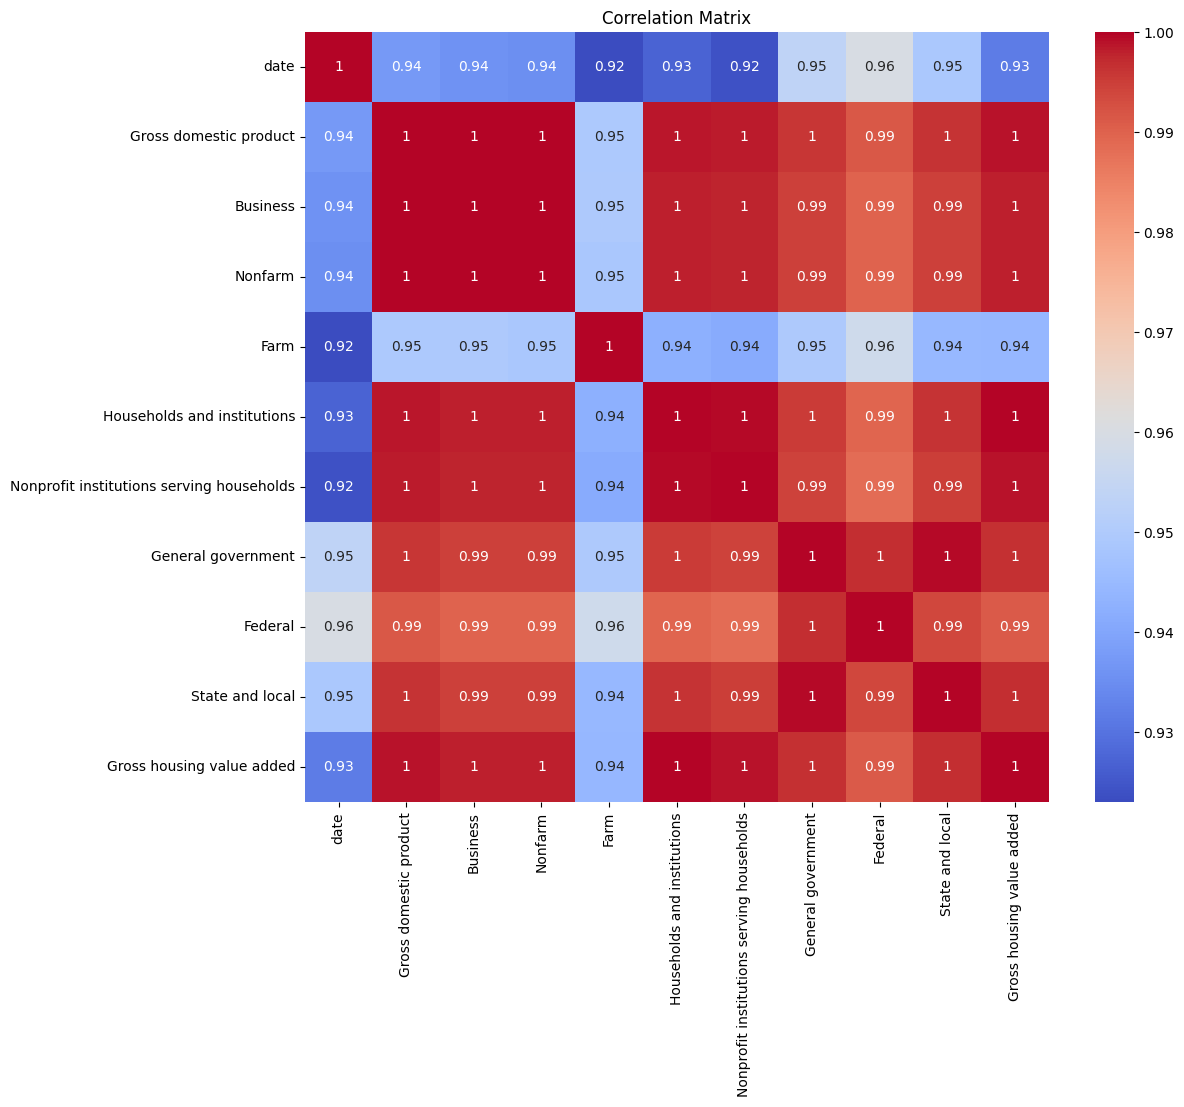

In [7]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

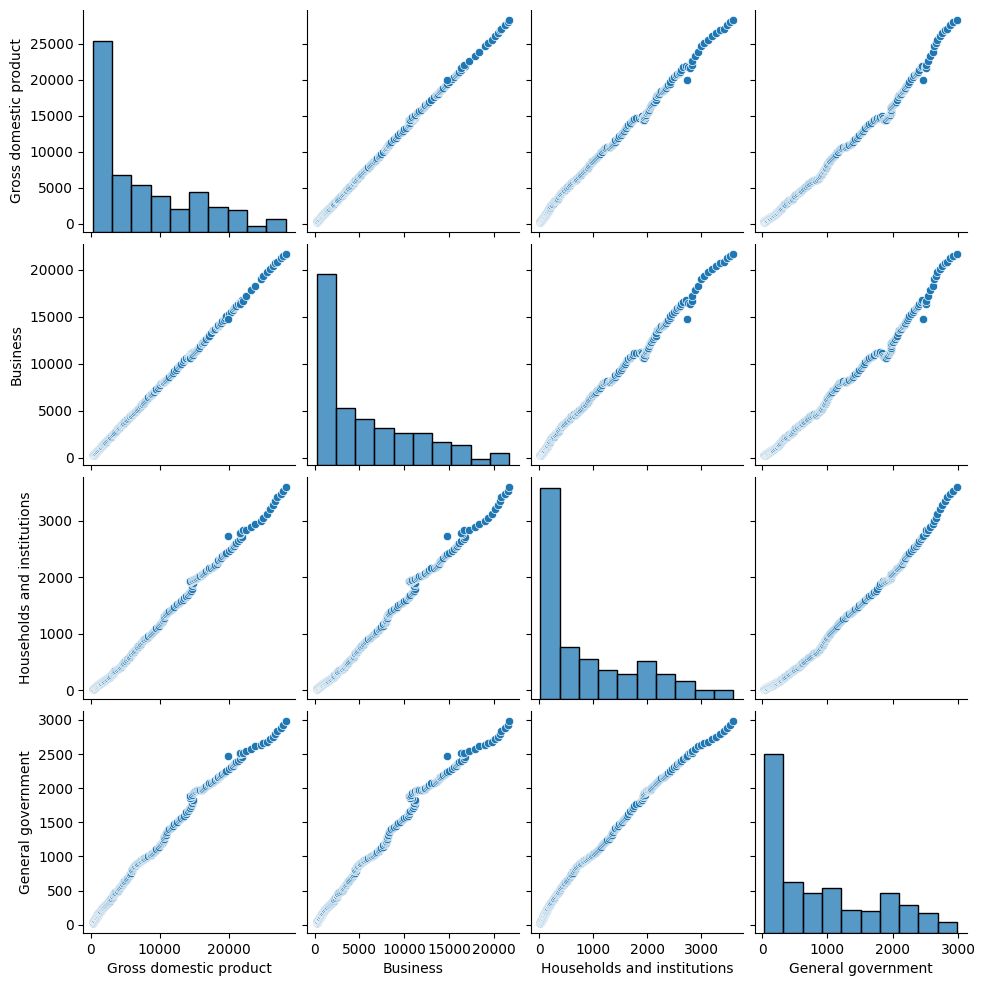

In [8]:
selected_vars = ['Gross domestic product', 'Business', 'Households and institutions', 'General government']
sns.pairplot(data[selected_vars])
plt.show()

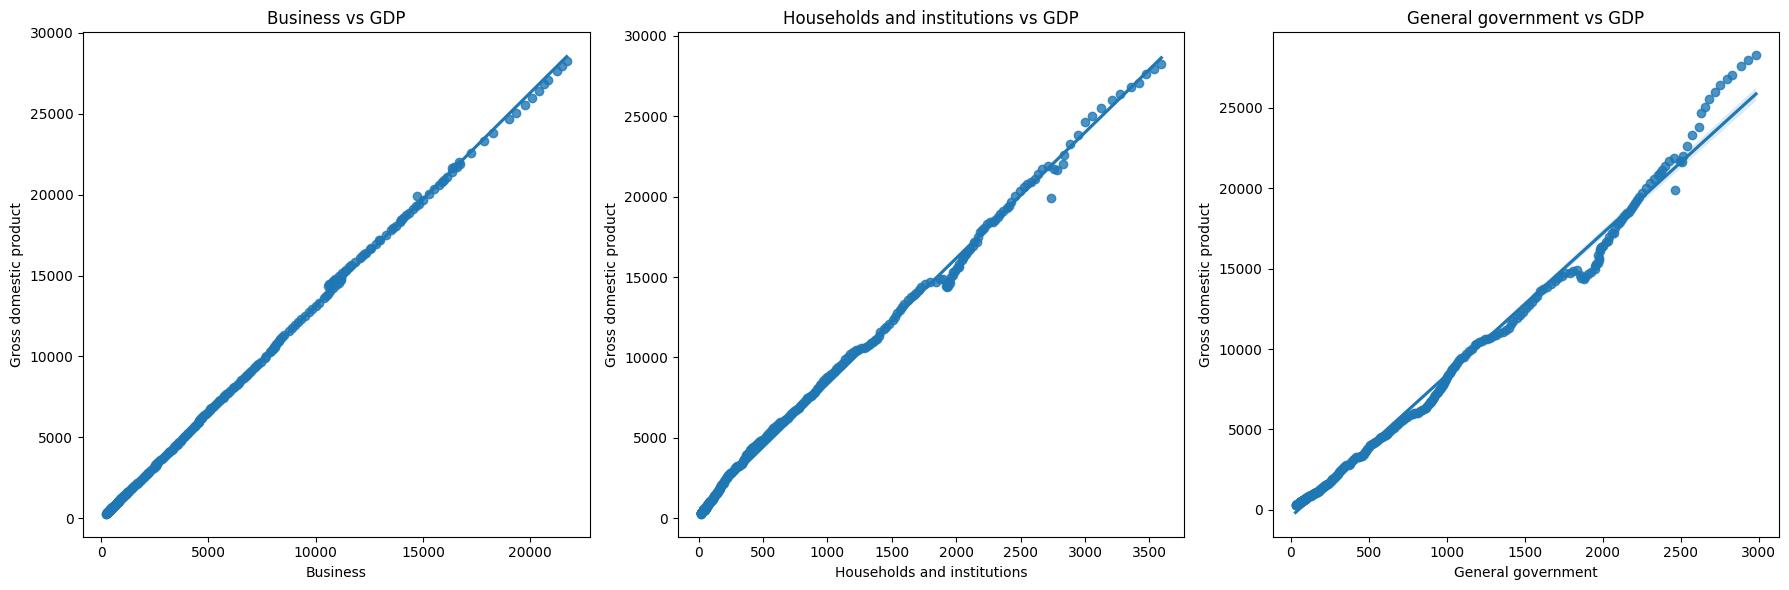

In [16]:
# Scatter Plot with Regression Lines
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
components = ['Business', 'Households and institutions', 'General government']
for i, component in enumerate(components):
    sns.regplot(x=component, y='Gross domestic product', data=data, ax=axes[i])
    axes[i].set_title(f'{component} vs GDP')
plt.tight_layout()
plt.show()

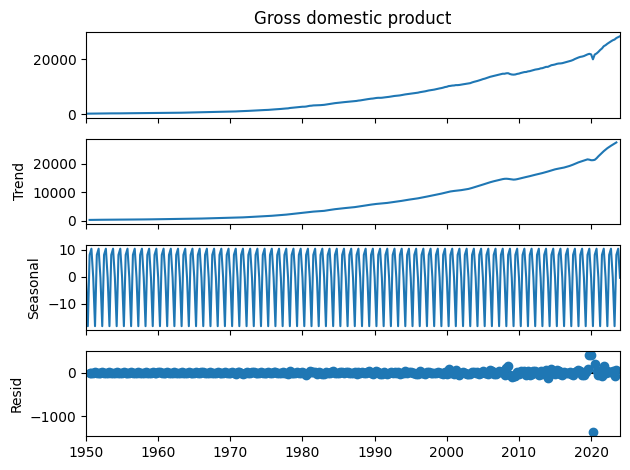

In [20]:
# Seasonal Decomposition Plot
from statsmodels.tsa.seasonal import seasonal_decompose
gdp = data.set_index('date')['Gross domestic product']
result = seasonal_decompose(gdp, model='additive', period=4)  # Assuming quarterly data
result.plot()
plt.tight_layout()
plt.savefig('seasonal_decomposition_plot.png')
plt.show()